In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from results import *

# Extract results
base_dirs = {
    'realtime': "decoder_results/realtime_results",
    'metzger': "decoder_results/metzger_results"
}
results = process_result_directories(base_dirs, exclude_entry_prefixes=['contin'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Processing  ECoG_50phrases_synthesis
Processing  chance_ECoG_tm1k_synthesis
Processing  ECoG_tm1k_synthesis
Processing  chance_ECoG_50phrases_synthesis
Processing  metzger_b3_tm1k
Processing  metzger_b3_50phrases


In [13]:
from metric_utils import *

# Define comparison sets to generate sentence error rates for
comparison_sets = [
    ('gt_text', 'asr_transcript'),
    ('gt_text', 'asr_transcript_causal'),
    ('gt_text', 'asr_transcript_streaming'),
    ('gt_text', 'pred_text'),
    ('gt_text', 'pred_text_causal'),
    ('gt_text', 'pred_text_streaming'),
    ('pred_text', 'asr_transcript'),
    ('pred_text_causal', 'asr_transcript_causal'),
    ('pred_text_streaming', 'asr_transcript_streaming'),
    ('gt_text', 'perceptual_transcript_streaming'),
    ('pred_text_streaming', 'perceptual_transcript_streaming'),
]

# generate error rates
g2p_names = [
    "realtime_ecog_50phrases_synthesis gt_text_vs_perceptual_transcript_streaming",
    "realtime_ecog_50phrases_synthesis gt_text_vs_pred_text_streaming", 
    "realtime_chance_ecog_50phrases_synthesis gt_text_vs_asr_transcript_streaming", 
    "realtime_chance_ecog_50phrases_synthesis gt_text_vs_pred_text_streaming",
    "realtime_ecog_tm1k_synthesis gt_text_vs_perceptual_transcript_streaming",
    "realtime_ecog_tm1k_synthesis gt_text_vs_pred_text_streaming",
    "realtime_chance_ecog_tm1k_synthesis gt_text_vs_asr_transcript_streaming",
    "realtime_chance_ecog_tm1k_synthesis gt_text_vs_pred_text_streaming",
    "realtime_ecog_tm1k_tts gt_text_vs_asr_transcript_streaming",
    "realtime_ecog_tm1k_tts gt_text_vs_pred_text_streaming",
    "realtime_chance_ecog_tm1k_tts gt_text_vs_asr_transcript_streaming",
    "realtime_chance_ecog_tm1k_tts gt_text_vs_pred_text_streaming",
    "realtime_ecog_50phrases_synthesis gt_text_vs_asr_transcript_streaming", 
    "realtime_ecog_tm1k_synthesis gt_text_vs_asr_transcript_streaming",
    "realtime_ecog_50phrases_synthesis pred_text_streaming_vs_perceptual_transcript_streaming",
    "realtime_ecog_tm1k_synthesis pred_text_streaming_vs_perceptual_transcript_streaming",
]
results_summary = calculate_error_rates_and_summarize(comparison_sets, results, N=10, max_pred_words=9, g2p_names=g2p_names)
cached_accuracy_results_summary = results_summary

realtime_ecog_50phrases_synthesis gt_text_vs_asr_transcript_streaming
realtime_ecog_50phrases_synthesis gt_text_vs_pred_text_streaming
realtime_ecog_50phrases_synthesis pred_text_streaming_vs_asr_transcript_streaming


/home/kaylo/repos/streaming.braindecoder/figures/error_rate.py:283: RuntimeWarning: divide by zero encountered in divide
  error_rates = error_rates / average_token_len
/home/kaylo/repos/streaming.braindecoder/figures/error_rate.py:284: RuntimeWarning: divide by zero encountered in scalar divide
  overall_error_rate /= (average_token_len * len(sequences['act']))
/home/kaylo/anaconda3/envs/rnnt/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


realtime_ecog_50phrases_synthesis gt_text_vs_perceptual_transcript_streaming
realtime_ecog_50phrases_synthesis pred_text_streaming_vs_perceptual_transcript_streaming
realtime_chance_ecog_tm1k_synthesis gt_text_vs_asr_transcript_streaming
realtime_chance_ecog_tm1k_synthesis gt_text_vs_pred_text_streaming
realtime_chance_ecog_tm1k_synthesis pred_text_streaming_vs_asr_transcript_streaming
realtime_ecog_tm1k_synthesis gt_text_vs_asr_transcript_streaming
realtime_ecog_tm1k_synthesis gt_text_vs_pred_text_streaming
realtime_ecog_tm1k_synthesis pred_text_streaming_vs_asr_transcript_streaming
realtime_ecog_tm1k_synthesis gt_text_vs_perceptual_transcript_streaming
realtime_ecog_tm1k_synthesis pred_text_streaming_vs_perceptual_transcript_streaming
realtime_chance_ecog_50phrases_synthesis gt_text_vs_asr_transcript_streaming
realtime_chance_ecog_50phrases_synthesis gt_text_vs_pred_text_streaming
realtime_chance_ecog_50phrases_synthesis pred_text_streaming_vs_asr_transcript_streaming
metzger_metzger

In [14]:
from metric_utils import *

# Define comparison sets to generate MCDs
comparison_sets = [
    ('gt_audio', 'pred_audio'),
    ('gt_audio', 'pred_audio_streaming')
]
detect_names = [
    "realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming",
    "realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming",
]

# Speech metrics
thresh = 0.1
latency_results_summary = calculate_speech_metrics_and_summarize(comparison_sets, results, max_pred_words=9, detect_names=detect_names, vad_threshold=thresh, results_summary=cached_accuracy_results_summary)

realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming
realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming
metzger_metzger_b3_tm1k gt_audio_vs_pred_audio
metzger_metzger_b3_50phrases gt_audio_vs_pred_audio


# Accuracy

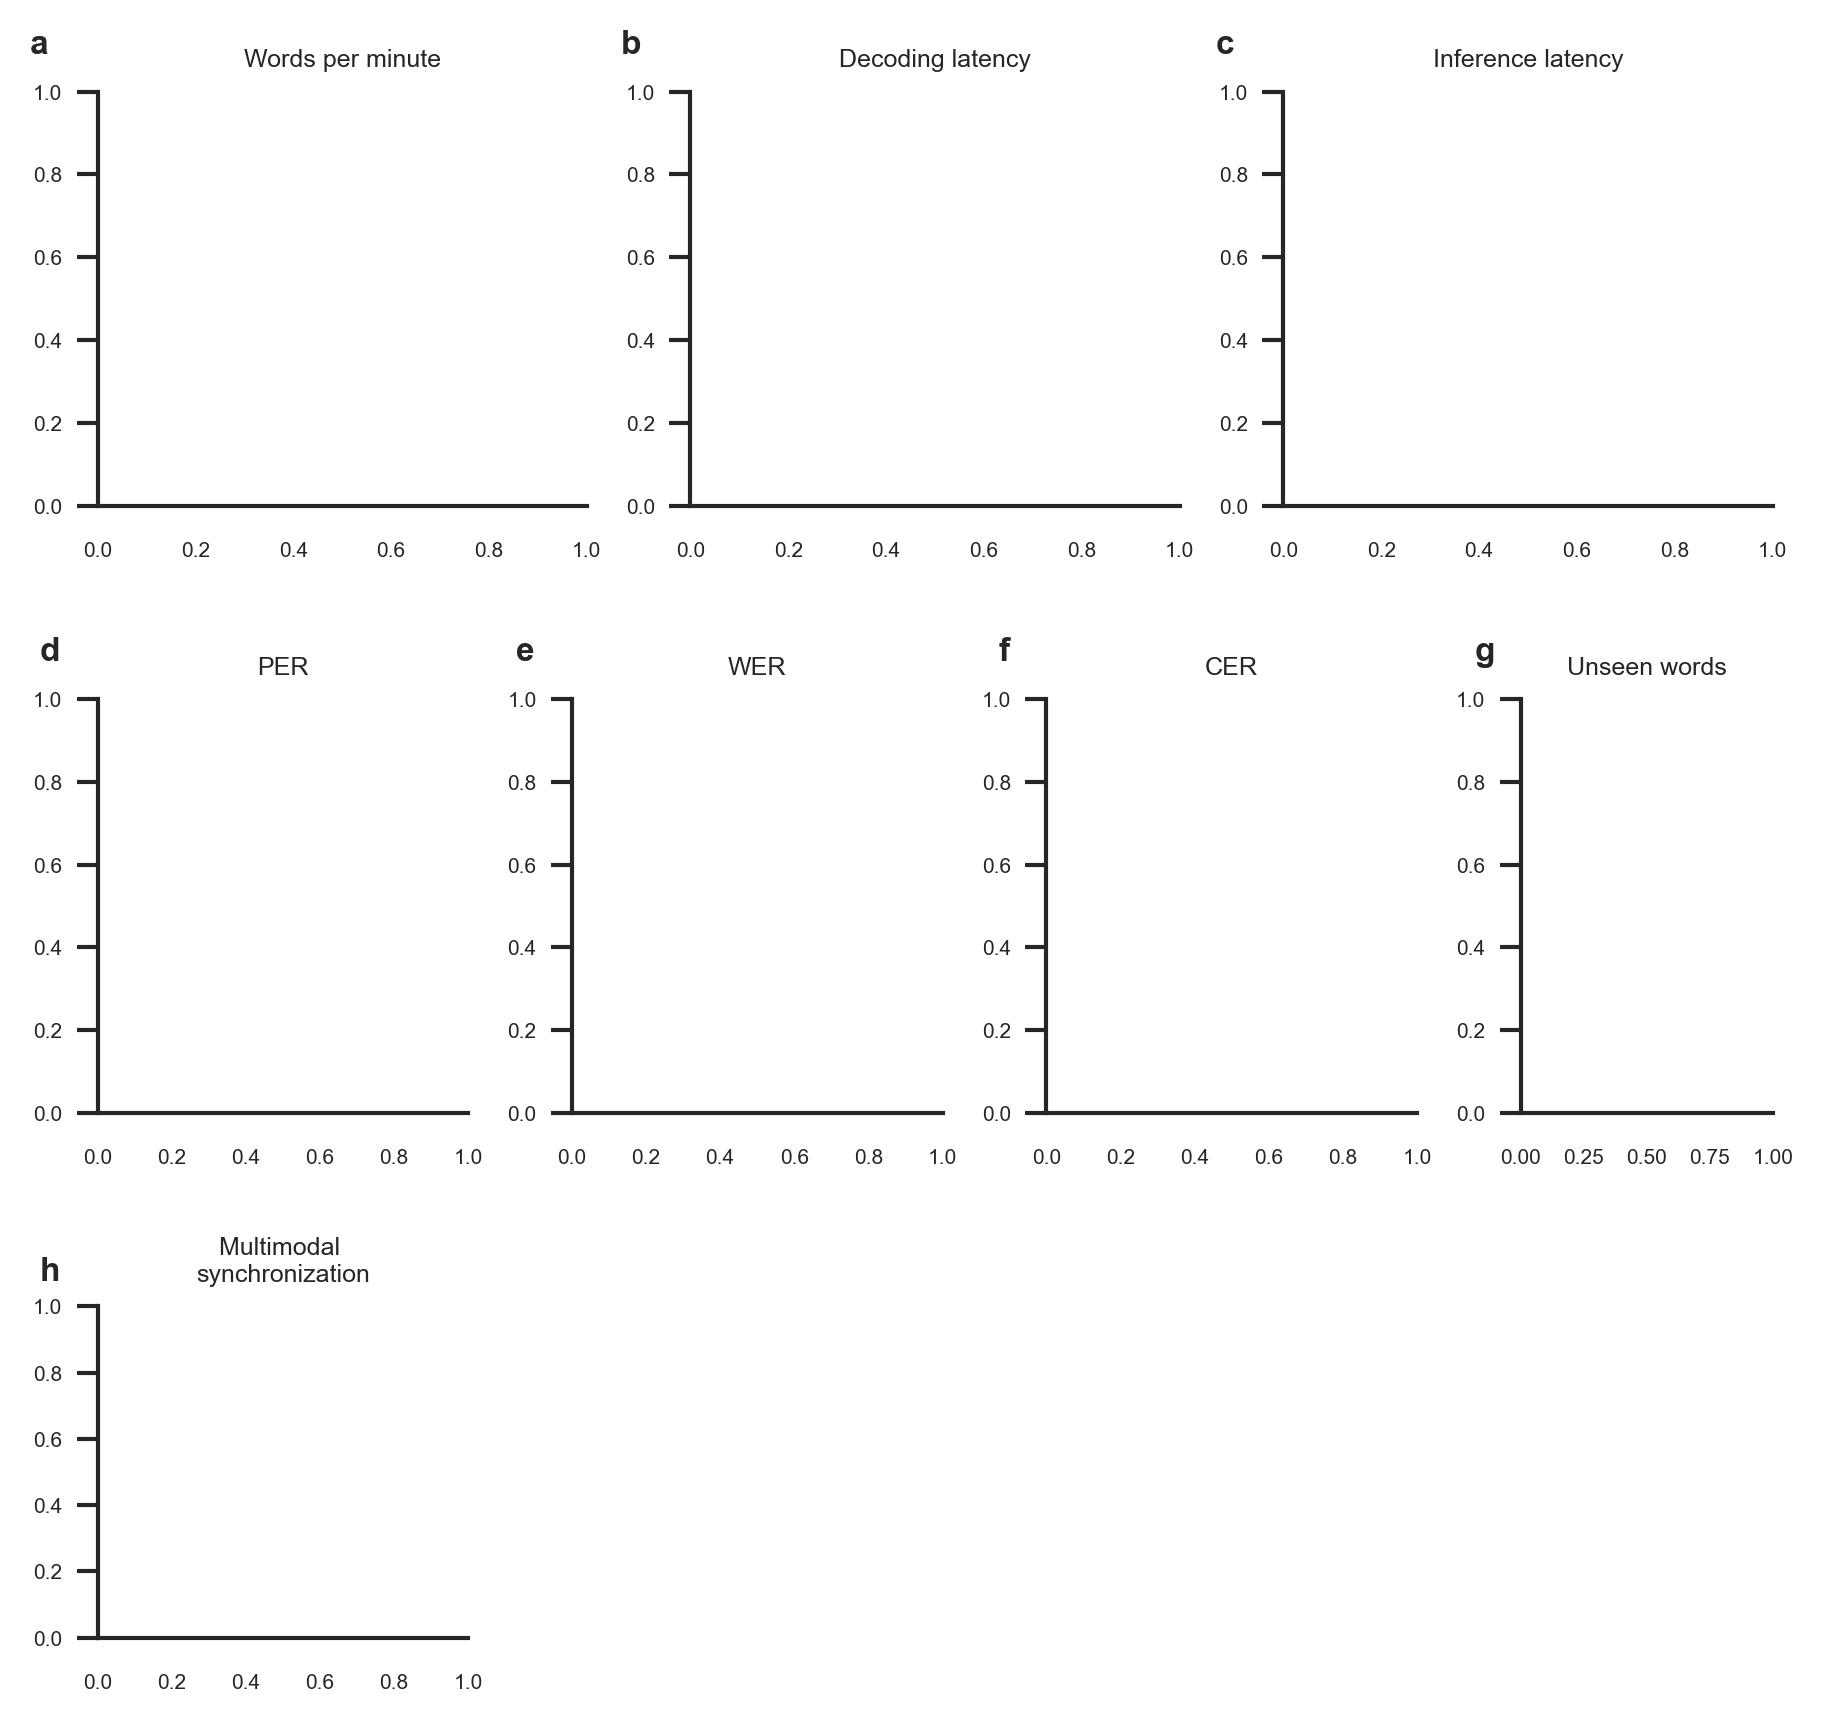

In [16]:
from results import *
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# p_value dictionary
stats_dict = {}

# plotting defaults
plotting_defaults(fontsize=5)
width_in_inches = 183 / 25.4 
height_in_inches = 170 / 25.4

# initialize plot
fig2 = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=300)
plt.rcParams['ytick.left'] = True

# Create a GridSpec layout with more specific positions and spanning, adjusted for the new size
fig2_gs = GridSpec(3, 15, hspace=0.5, wspace=7.0, height_ratios=[1, 1, 0.8])
titles = [
    "Words per minute", "Decoding latency", "Inference latency",
    "PER", "WER", "CER", "Unseen words",
    "Multimodal \nsynchronization", 
]

# Adjust positions according to the new GridSpec definition
positions = [
    (fig2_gs[0, :5]), (fig2_gs[0, 5:10]), (fig2_gs[0, 10:]),
    (fig2_gs[1, :4]), (fig2_gs[1, 4:8]), (fig2_gs[1, 8:12]), (fig2_gs[1, 12:]),
    (fig2_gs[2, :4]),
]
panel_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Create a dictionary to store the axes with the corrected setup
fig2_axes = create_custom_subplots(fig2, positions, titles, panel_letters)
plt.show()

# Error rates

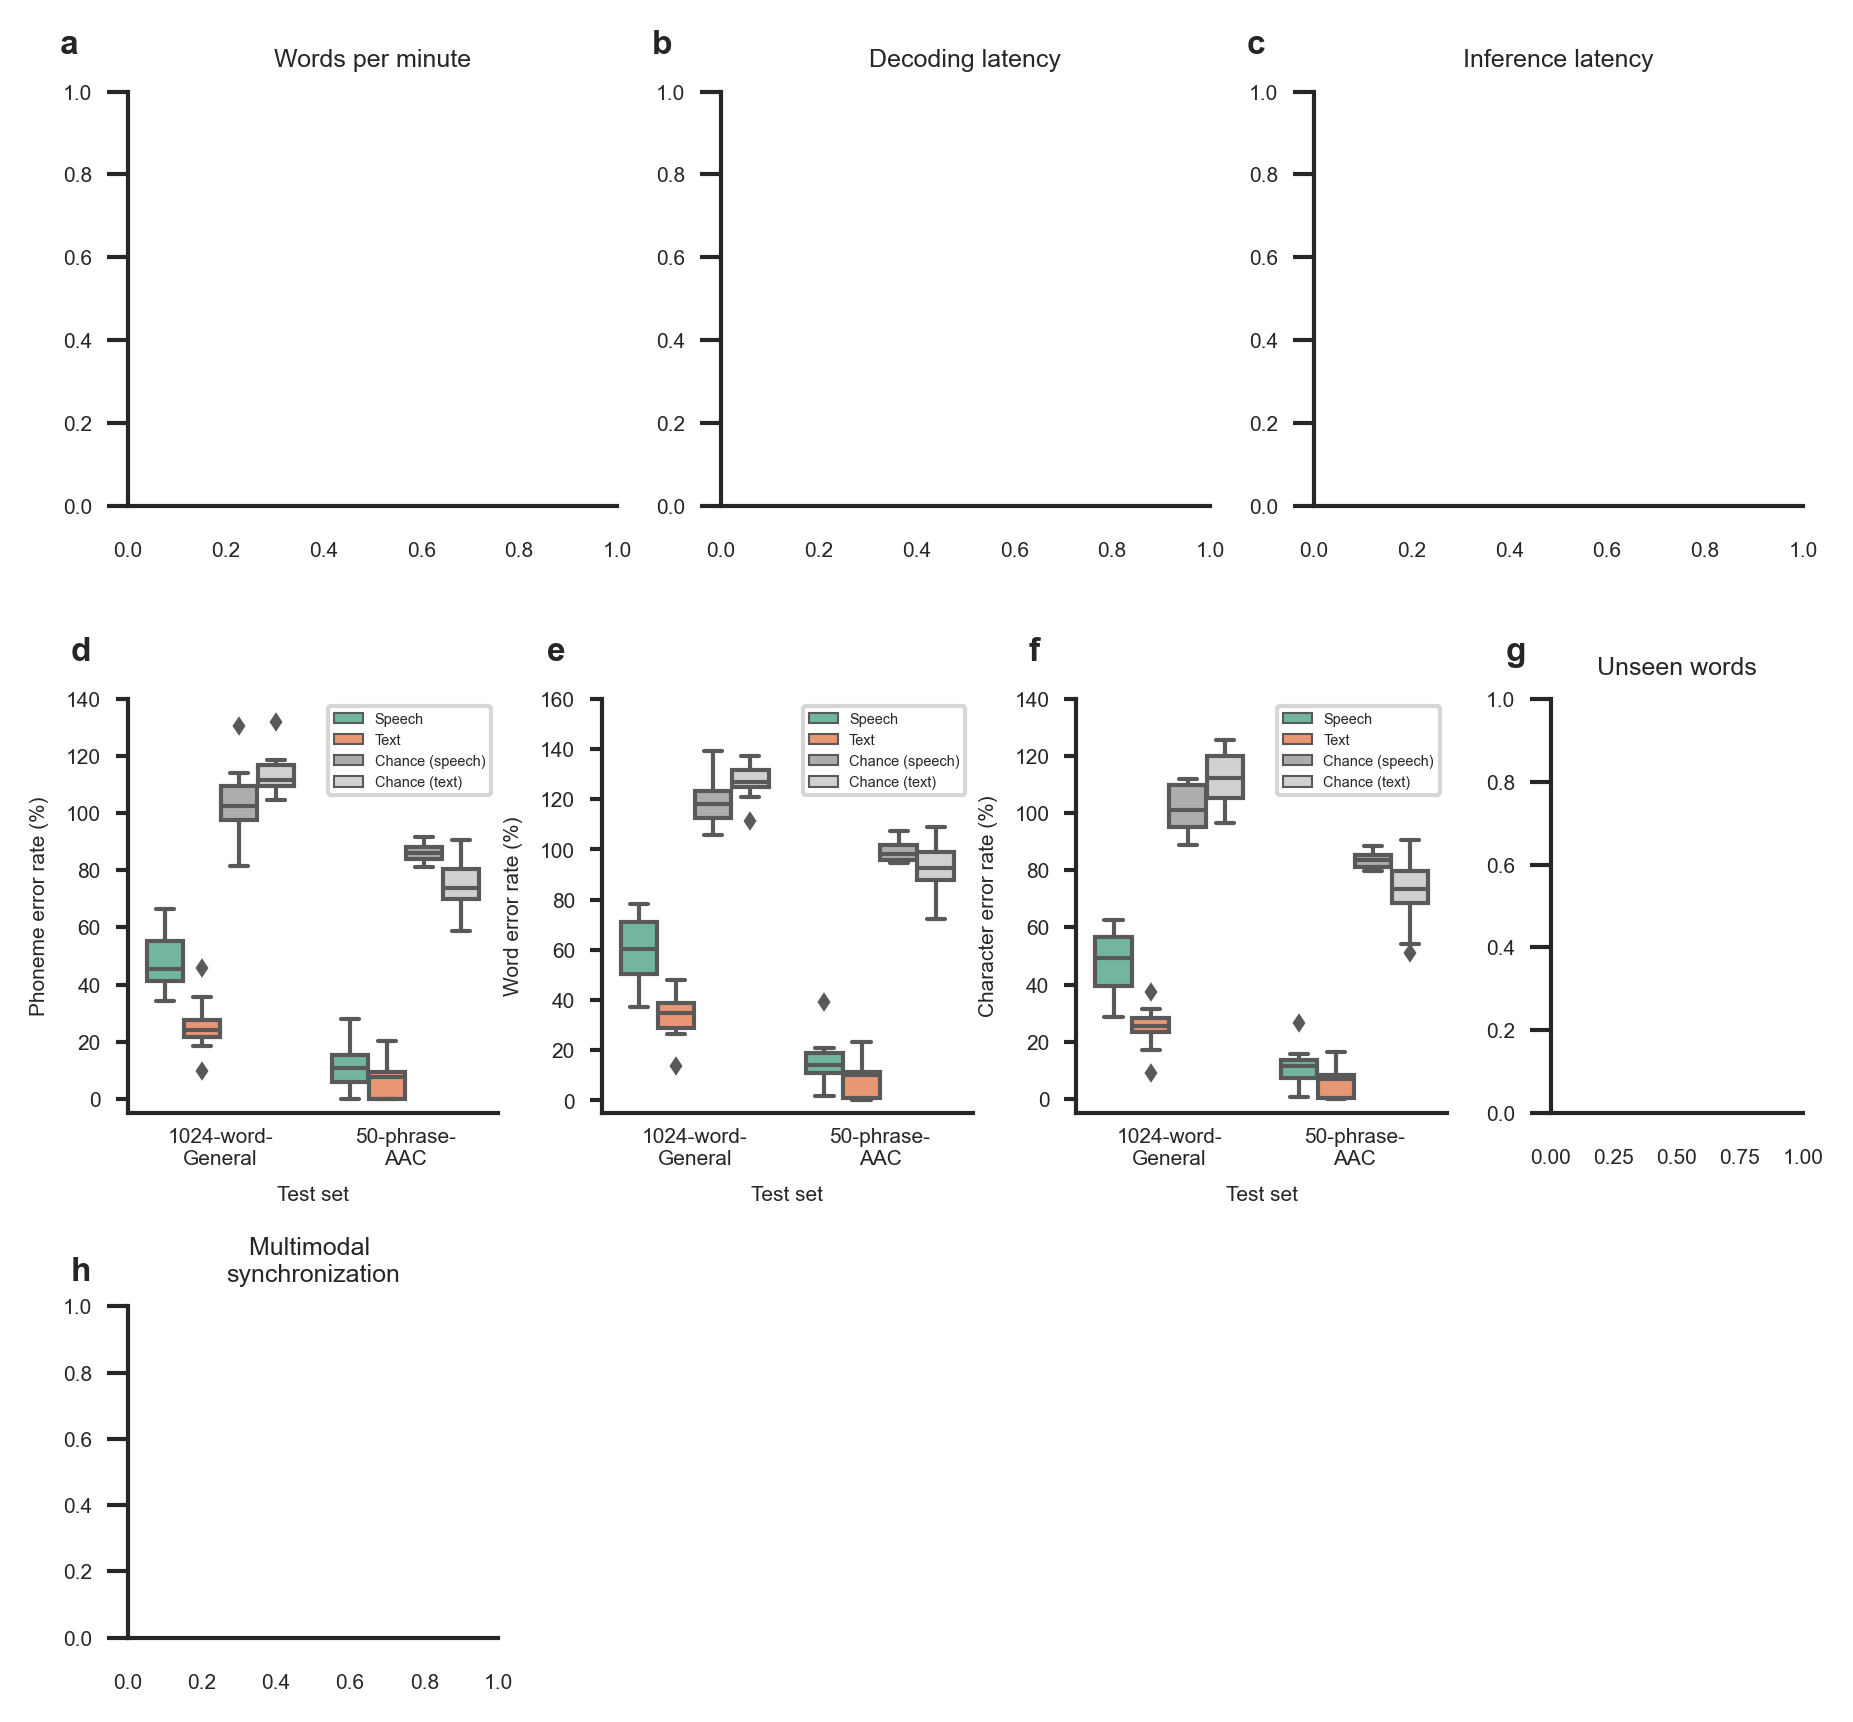

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import scipy.stats as stats
from results import *
from metric_utils import *

# Generate WER and CER plot
specified_comparisons = [
    "realtime_ecog_50phrases_synthesis gt_text_vs_perceptual_transcript_streaming", # speech
    "realtime_ecog_50phrases_synthesis gt_text_vs_pred_text_streaming", # text
    "realtime_chance_ecog_50phrases_synthesis gt_text_vs_asr_transcript_streaming", # chance (speech)
    "realtime_chance_ecog_50phrases_synthesis gt_text_vs_pred_text_streaming", # chance (text)
    "realtime_ecog_tm1k_synthesis gt_text_vs_perceptual_transcript_streaming",
    "realtime_ecog_tm1k_synthesis gt_text_vs_pred_text_streaming",
    "realtime_chance_ecog_tm1k_synthesis gt_text_vs_asr_transcript_streaming",
    "realtime_chance_ecog_tm1k_synthesis gt_text_vs_pred_text_streaming",
]
data = []
for comparison in specified_comparisons:
    metrics = results_summary[comparison]
    is_chance = 'chance' in comparison
    modality = 'Speech' if 'asr_transcript' in comparison or 'percept' in comparison else 'Text'
    modality_label = 'Chance (' + modality.lower() + ')' if is_chance else modality

    # Extract condition from comparison
    parts = comparison.split('_')
    condition_raw = '_'.join(parts[1:3]) if not is_chance else '_'.join(parts[2:4])
    condition_map = {
        'ecog_50phrases': '50-phrase-\nAAC',
        'ecog_tm1k': '1024-word-\nGeneral'
    }
    condition = condition_map.get(condition_raw, condition_raw)
    for wer in metrics['wers']:
        data.append({'Condition': condition, 'Modality': modality_label, 'Metric': 'WER', 'Value': wer * 100})
    for cer in metrics['cers']:
        data.append({'Condition': condition, 'Modality': modality_label, 'Metric': 'CER', 'Value': cer * 100})
    for per in metrics['pers']:
        data.append({'Condition': condition, 'Modality': modality_label, 'Metric': 'PER', 'Value': per * 100})
    if 'chance' in comparison:
        continue
    for met in ['pers', 'wers', 'cers']:
        bootstrapped_data = get_bootstrapped_accuracies(metrics[met], median=True, num_repeats=1000)
        confidence_interval = (np.percentile(bootstrapped_data,0.5).round(decimals=5), np.percentile(bootstrapped_data,99.5).round(decimals=5))
df = pd.DataFrame(data)

# Calculate mean chance values for each condition and metric
conditions = ['1024-word-\nGeneral', '50-phrase-\nAAC']
metrics = ['PER', 'WER', 'CER']
mean_chance_values = {}
for condition in conditions:
    for metric in metrics:
        for modality in ['Speech', 'Text']:
            mean_value = df[(df['Modality'] == f"Chance ({modality.lower()})") & (df['Metric'] == metric) & (df['Condition'] == condition)]['Value'].mean()
            mean_chance_values[f"{condition}_{modality}_{metric}"] = mean_value

# Phoneme error rate panel
sns.set_style("white")
palette = sns.color_palette("Set2")  
grey_palette = sns.color_palette("Greys_r")[3:] 
modality_order = ['Speech', 'Text', 'Chance (speech)', 'Chance (text)']
condition_order = ['1024-word-\nGeneral', '50-phrase-\nAAC']
flierprops = dict(markersize=2)
ax = fig2_axes['d']
ax.cla()
plt_df = df[df['Metric'] == 'PER']
ax.text(-0.1, 1.15, f"d", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
combined_palette = palette[:2] + grey_palette
sns.boxplot(x='Condition', y='Value', hue='Modality', hue_order=modality_order, order=condition_order,
            data=plt_df, ax=ax, palette=combined_palette, flierprops=flierprops)
ax.set_ylim(-5, 140)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', fontsize='x-small', ncols=1)
ax.set_ylabel('Phoneme error rate (%)')
ax.set_xlabel('Test set')
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', which='both', length=3, width=1, direction='out')

# Word error rate panel
sns.set_style("white")
palette = sns.color_palette("Set2")
ax = fig2_axes['e']
plt_df = df[df['Metric'] == 'WER']
ax.cla()
ax.text(-0.1, 1.15, f"e", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
combined_palette = palette[:2] + grey_palette
sns.boxplot(x='Condition', y='Value', hue='Modality', hue_order=modality_order, order=condition_order,
            data=plt_df, ax=ax, palette=combined_palette, flierprops=flierprops)
ax.set_ylim(-5, 160)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', fontsize='x-small', ncols=1)
ax.set_ylabel('Word error rate (%)')
ax.set_xlabel('Test set')
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', which='both', length=3, width=1, direction='out')

# Character error rate panel
sns.set_style("white")
palette = sns.color_palette("Set2")
ax = fig2_axes['f'] 
ax.cla()
ax.text(-0.1, 1.15, f"f", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
plt_df = df[df['Metric'] == 'CER']
combined_palette = palette[:2] + grey_palette
sns.boxplot(x='Condition', y='Value', hue='Modality', hue_order=modality_order, order=condition_order,
            data=plt_df, ax=ax, palette=combined_palette, flierprops=flierprops)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', fontsize='x-small', ncols=1)
ax.set_ylabel('Character error rate (%)')
ax.set_xlabel('Test set')
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', which='both', length=3, width=1, direction='out')
ax.set_ylim(-5, 140)
display(fig2)

# Table 1

In [18]:
# Create table for illustrative speech-synthesis examples
specified_comparisons = [
    "realtime_ecog_tm1k_synthesis gt_text_vs_perceptual_transcript_streaming"
]
data = []
for comparison in specified_comparisons:
    metrics = results_summary[comparison]
    for i, (wer, gt_text, pred_text) in enumerate(zip(metrics['raw_wers'], metrics['source_text'], metrics['pred_text'])):
        key = 'Decoded speech'
        if not any(d['Target sentence'] == gt_text for d in data):
            data.append({'Target sentence': gt_text.capitalize(), key: pred_text.capitalize(), 'WER (%)': round(wer * 100, 1)})
        else:
            for d in data:
                if d['Target sentence'] == gt_text:
                    d[key] = pred_text.capitalize()
                    d['WER (%)'] = wer * 100
df = pd.DataFrame(data)

# Calculate WER percentiles
df['WER Percentile (%)'] = df['WER (%)'].rank(pct=True).apply(lambda x: round(x * 100, 1))
df_sorted = df.sort_values(by='WER Percentile (%)')
def select_examples_by_indices(df, indices):
    selected_rows = df.iloc[indices]
    return selected_rows

desired_indices = [0, 4, 5, 7, 10, 13, 14, 16, 30, 40, 41, 53, 70, 84, 99] 

# Select and display the hand-picked rows
selected_examples_df = select_examples_by_indices(df_sorted, desired_indices)
selected_examples_df_reset = selected_examples_df.reset_index(drop=True)
display(selected_examples_df_reset)

,Target sentence,Decoded speech,WER (%),WER Percentile (%)
0,What did you say to her,What did you say to her,0.0,6.0
1,I want to see you,I want to see you,0.0,6.0
2,What does she want,What does she want,0.0,6.0
3,Why did he tell you,Why did he tell you,0.0,6.0
4,How can we get out,How can we get out,0.0,6.0
5,They think you did it,,20.0,15.0
6,Where did you get this,Where did you get that,20.0,15.0
7,I need the money,I need the lawn,25.0,19.0
8,How did you get here,How did you hear,40.0,29.5
9,Can we come up,Can we do,50.0,37.5


# Unseen words

/tmp/ipykernel_3148180/2497516078.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y*100)}" for y in ax.get_yticks()])


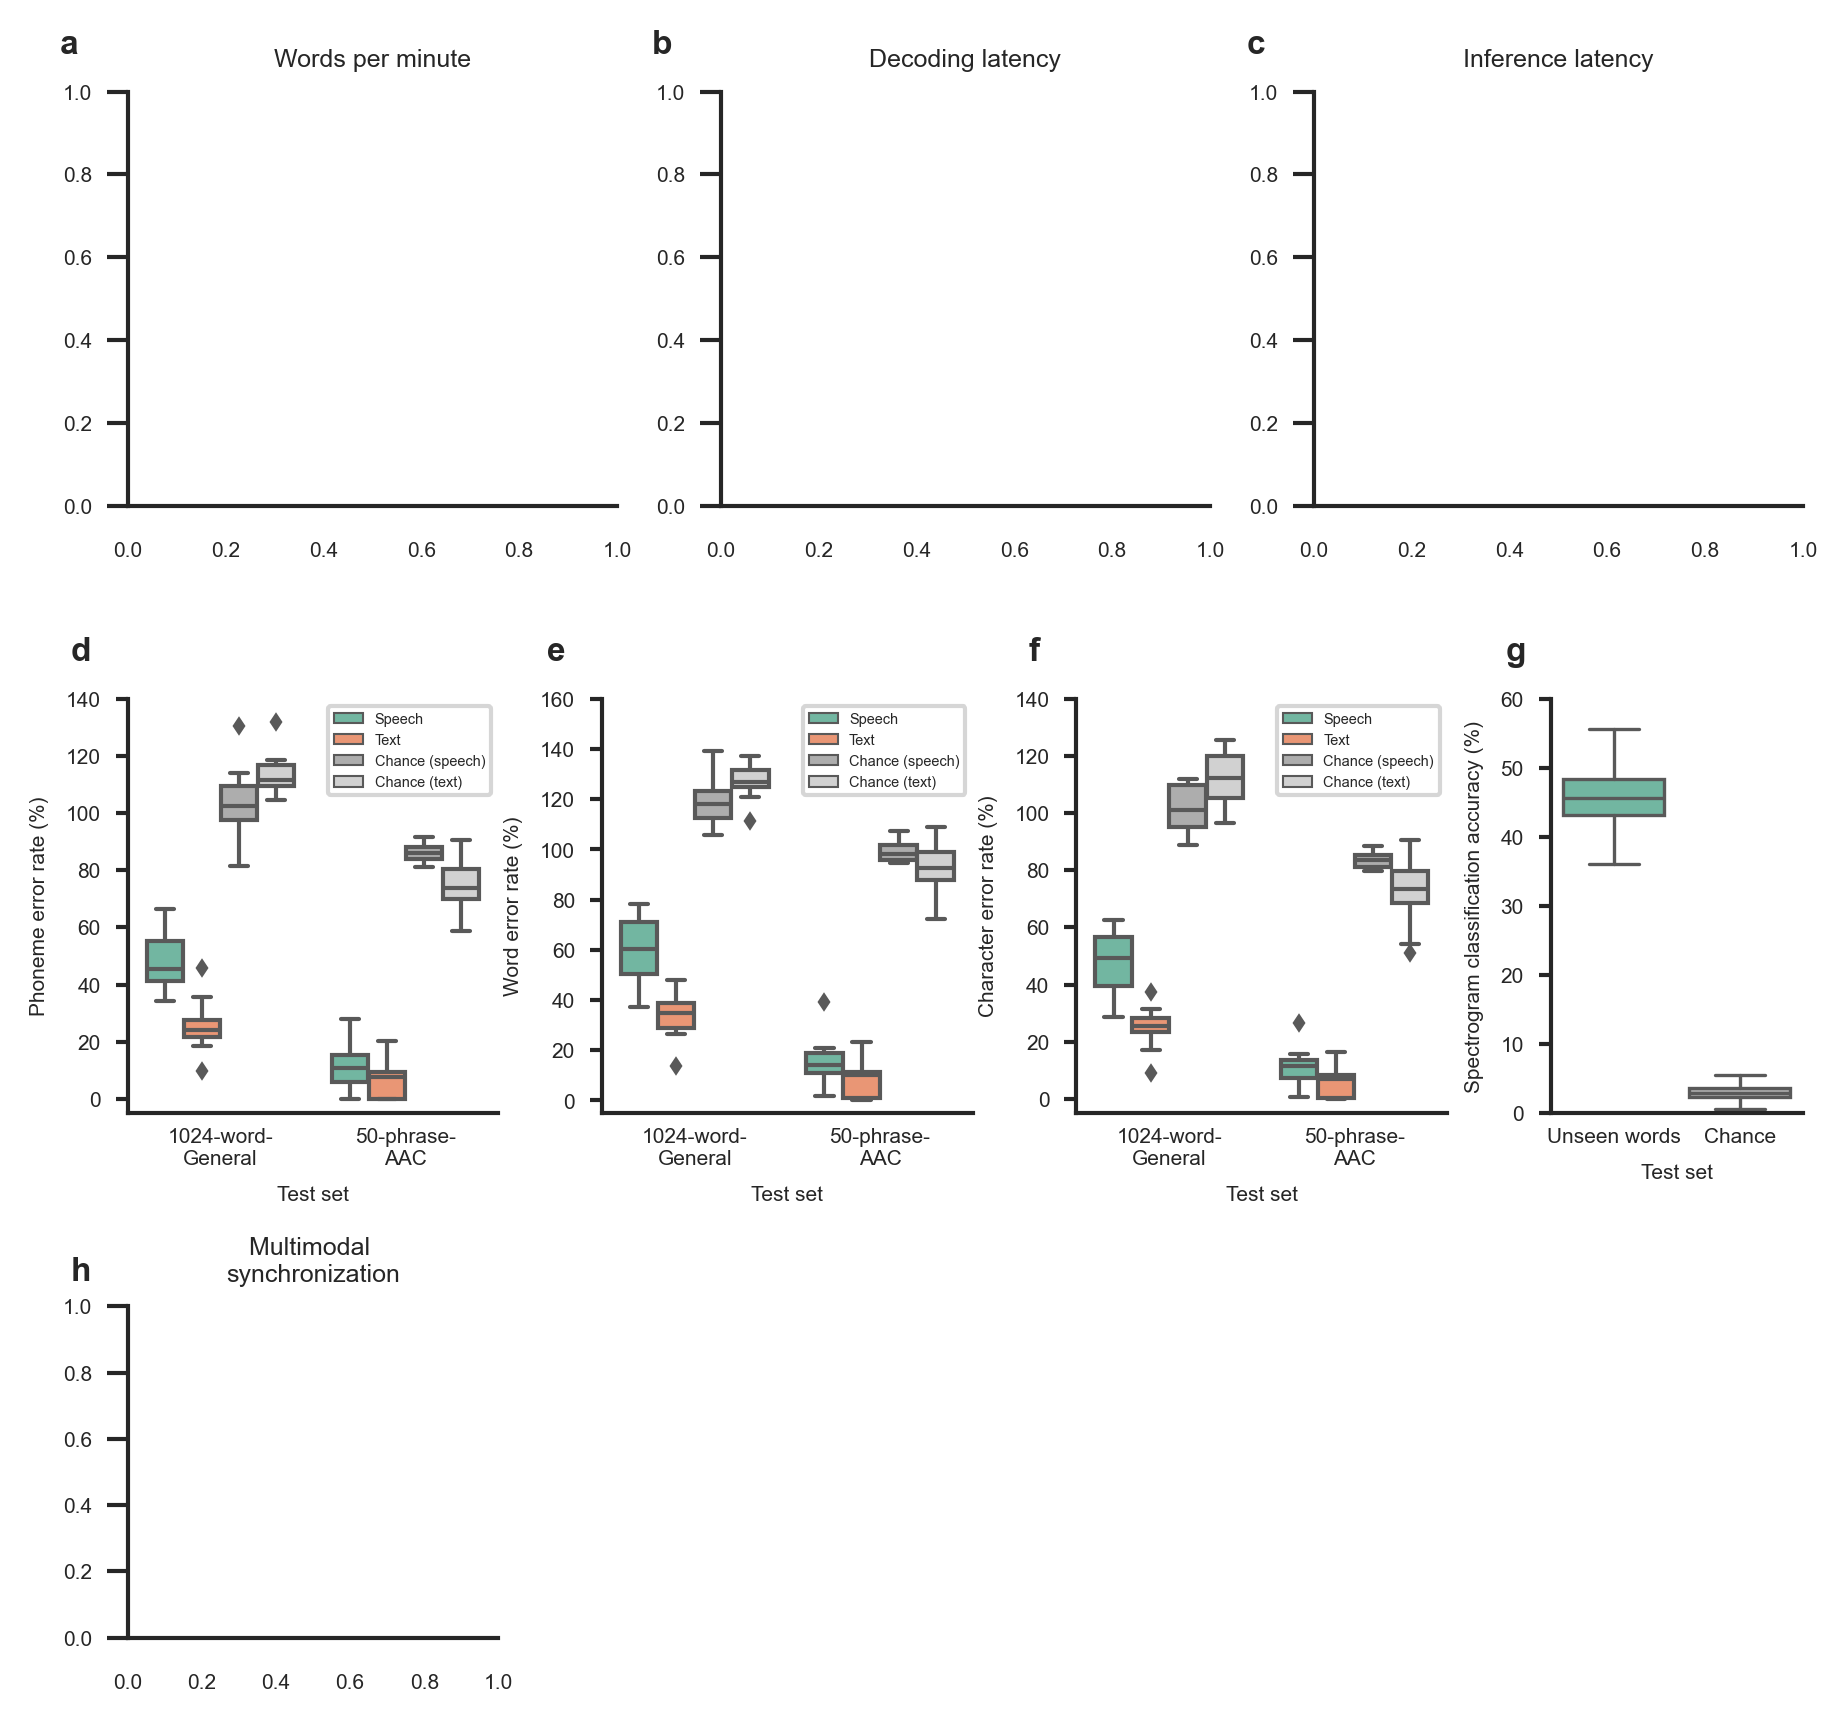

<Figure size 640x480 with 0 Axes>

In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# Unseen data vec
loaded_data = np.load("ecog_synthesis_data.npz")
gt_idx_vec = loaded_data['gt_idx']
gt_text_vec = loaded_data['gt_text']
with open('generalization_results_realtime.pkl', 'rb') as f:
    gen_results = pickle.load(f)

n_splits = 20

# Loop over each paradigm and compute the cumulative confusion matrix
paradigm = "ECoG_tm1k_synthesis"
p_results = gen_results[paradigm]
prediction_probs = p_results['prediction_probs']  # Predicted probabilities for each fold
y_true_all_folds = np.array(gt_idx_vec)  # Ground truth labels for all samples

# Initialize lists to collect all predictions and true labels
all_y_pred = []
all_y_true = []

# Set up KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the folds
for fold_num, (train_index, test_index) in enumerate(kf.split(y_true_all_folds)):
    # True labels for this fold (test set)
    y_true_fold = y_true_all_folds[test_index]
    
    # Get predicted labels (from prediction probabilities for this fold)
    y_pred_fold = np.argmax(prediction_probs[fold_num], axis=1)

    # Accumulate true and predicted labels across folds
    all_y_true.extend(y_true_fold)
    all_y_pred.extend(y_pred_fold)

# Convert to numpy arrays
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Use unique values in y_true_all_folds as the labels for confusion_matrix
unique_labels = np.unique(y_true_all_folds)

# Create a mapping from unique_labels to an index in the range [0, len(unique_labels)-1]
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

# Map only `all_y_true` to 0-based indices since `all_y_pred` is already on the correct scale
all_y_true_mapped = np.array([label_to_index[label] for label in all_y_true])

# Compute the confusion matrix using the mapped `all_y_true` and the unchanged `all_y_pred`
cumulative_cm = confusion_matrix(all_y_true_mapped, all_y_pred, normalize='true')

# Sort the confusion matrix by class accuracy
class_accuracies = [(acc, cls, idx) for acc, cls, idx in zip(np.diag(cumulative_cm), gt_text_vec, unique_labels)]
class_accuracies.sort(reverse=True, key=lambda x: x[0])
sorted_indices = [label_to_index[idx] for acc, cls, idx in class_accuracies]  # Use the mapped indices for sorting

# nato mapping
keys = [458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483]
nato_phonetic_alphabet = [
    "alpha", "bravo", "charlie", "delta", "echo", "foxtrot", "golf", 
    "hotel", "india", "juliet", "kilo", "lima", "mike", "november", 
    "oscar", "papa", "quebec", "romeo", "sierra", "tango", "uniform", 
    "victor", "whiskey", "x-ray", "yankee", "zulu"
]
sorted_values = sorted(nato_phonetic_alphabet)
nato_map = dict(zip(keys, sorted_values))

# Re-order the confusion matrix and labels based on sorted indices
cumulative_cm = cumulative_cm[sorted_indices, :][:, sorted_indices]
sorted_labels = [nato_map[index_to_label[i]] for i in sorted_indices]
labels=sorted_labels
assert cumulative_cm.shape[0] == cumulative_cm.shape[1], "Confusion matrix is not square!"
assert cumulative_cm.shape[0] == len(labels), "Mismatch between labels and confusion matrix size!"

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, bootstrap, wilcoxon

# Number of bootstrap samples
n_bootstrap = 1000
random_seed = 42

# Compute mean accuracy for each class
class_accuracies = np.diag(cumulative_cm)

# Calculate the overall accuracy
overall_accuracy = np.mean(class_accuracies)

# Loop over each paradigm and compute the cumulative confusion matrix
paradigm = "chance_ECoG_tm1k_synthesis"
p_results = gen_results[paradigm]
prediction_probs = p_results['prediction_probs']  # Predicted probabilities for each fold
y_true_all_folds = np.array(gt_idx_vec)  # Ground truth labels for all samples
all_y_pred = []
all_y_true = []
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for fold_num, (train_index, test_index) in enumerate(kf.split(y_true_all_folds)):
    y_true_fold = y_true_all_folds[test_index]
    y_pred_fold = np.argmax(prediction_probs[fold_num], axis=1)
    all_y_true.extend(y_true_fold)
    all_y_pred.extend(y_pred_fold)
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)
unique_labels = np.unique(y_true_all_folds)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}
all_y_true_mapped = np.array([label_to_index[label] for label in all_y_true])
chance_cumulative_cm = confusion_matrix(all_y_true_mapped, all_y_pred, normalize='true')
chance_class_accuracies = np.diag(chance_cumulative_cm)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statannot import add_stat_annotation

# Prepare data for plotting
ax = fig2_axes["g"]
ax.cla()
ax.text(-0.1, 1.15, f"g", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})

# Bootstrap function to compute confidence intervals
np.random.seed(random_seed)
bootstrap_accuracies = []
chance_bootstrap_accuracies = []
for i in range(n_bootstrap):
    sample_indices = np.random.choice(range(len(class_accuracies)), size=len(class_accuracies), replace=True)
    sample_accuracies = class_accuracies[sample_indices]
    bootstrap_accuracies.append(np.mean(sample_accuracies))

    chance_sample_indices = np.random.choice(range(len(chance_class_accuracies)), size=len(chance_class_accuracies), replace=True)
    chance_sample_accuracies = chance_class_accuracies[chance_sample_indices]
    chance_bootstrap_accuracies.append(np.mean(chance_sample_accuracies))
bootstrap_accuracies = np.array(bootstrap_accuracies)
chance_bootstrap_accuracies = np.array(chance_bootstrap_accuracies)

# Data to long format
data = np.array(bootstrap_accuracies)
chance = np.array(chance_bootstrap_accuracies)
box_data = np.concatenate([data, chance])
labels = ["Unseen words"] * len(data) + ["Chance"] * len(chance)

# Create a DataFrame for seaborn and statannot
df = pd.DataFrame({
    "Accuracy": box_data,
    "Category": labels
})

# Create the box plot
palette = sns.color_palette("Set2")[0]  
grey_palette = sns.color_palette("Greys_r")[3]
plot_pallete = [palette, grey_palette]
sns.set_palette(plot_pallete)
sns.boxplot(x="Category", y="Accuracy", data=df, ax=ax, showfliers=False, linewidth=0.8)
ax.set_ylim(0, 0.6)
ax.set_ylabel("Spectrogram classification accuracy (%)")
ax.set_xlabel("Test set")

# Convert y-axis to percentage format
ax.set_yticklabels([f"{int(y*100)}" for y in ax.get_yticks()])
ax.tick_params(axis='x', which='both', length=0, width=1, direction='out')
ax.tick_params(axis='y', which='both', length=3, width=1, direction='out')

# Display the figure
plt.tight_layout()
display(fig2)

# Speeds and Latency

50-phrase-AAC
speech latency
2.14379 (2.04974, 2.22188)
text latency
2.34965 (2.2815, 2.43139)
1024-word-General
speech latency
1.11558 (1.03358, 1.2527)
text latency
1.00641 (0.91249, 1.13008)
Speech started before cue 0 times.
Text started before cue 0 times.


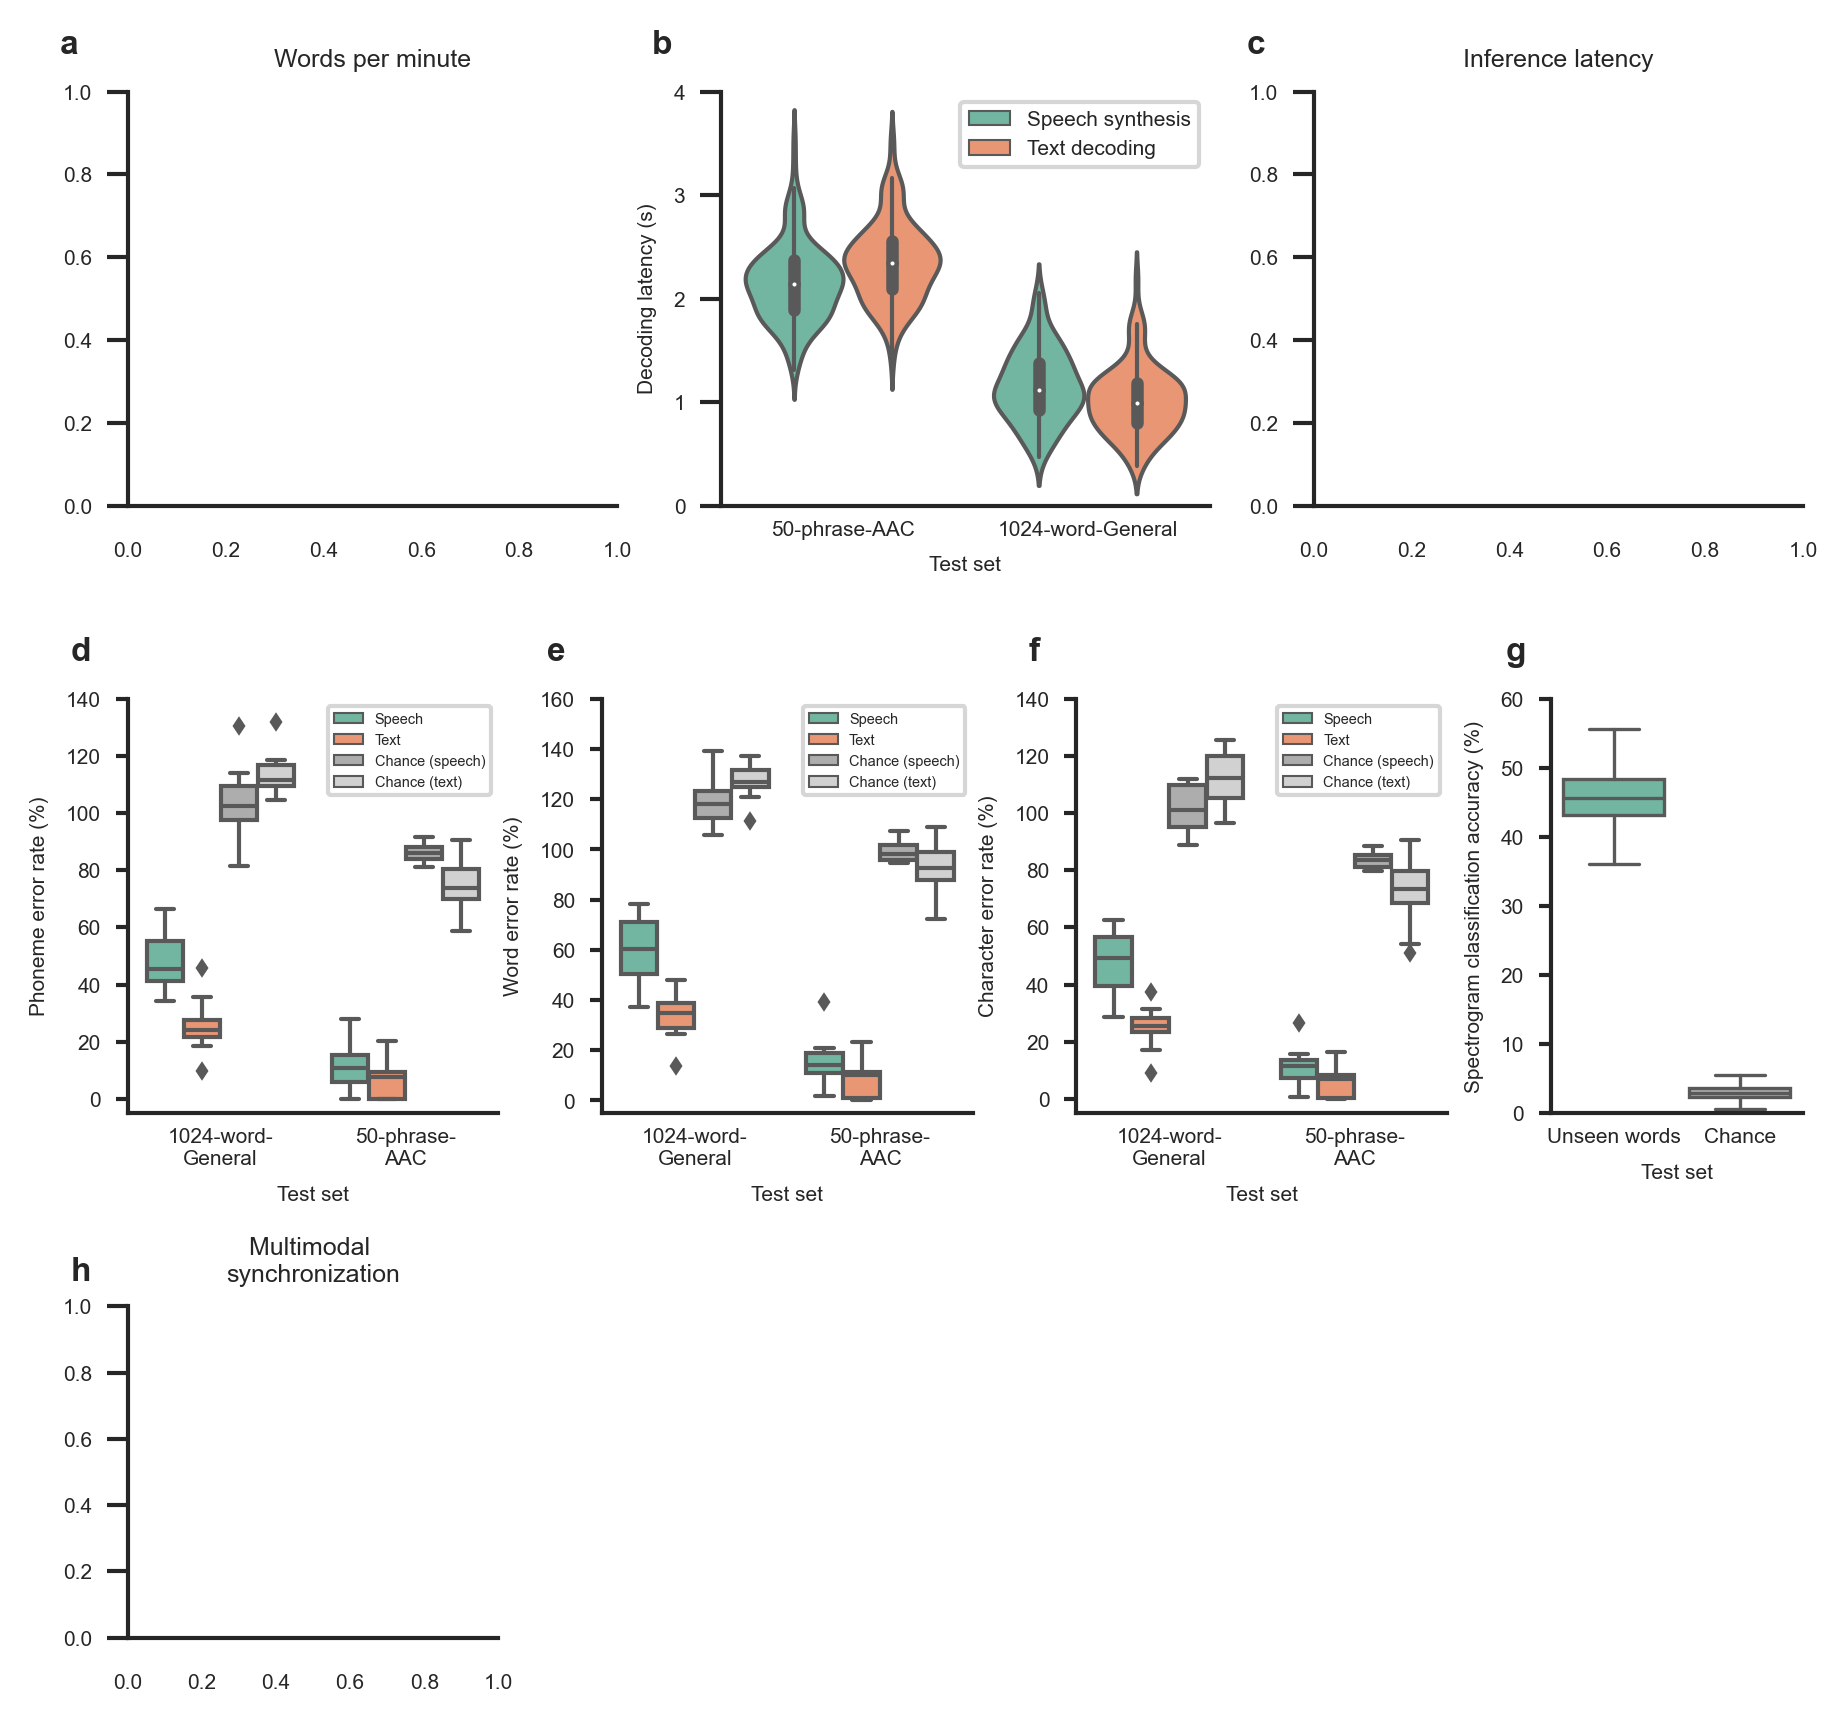

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

specified_comparisons = [
    "realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming",
    "realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming"
]
data = []
data_supp = []
off_data = []
speech_before_cue_count = 0
text_before_cue_count = 0

for comparison, metrics in latency_results_summary.items():
    if comparison in specified_comparisons:
        if "50phrases" in comparison:
            condition = '50-phrase-AAC'
        elif "tm1k" in comparison:
            condition = '1024-word-General'
        else:
            condition = 'Unknown'
        print(condition)
        text_metrics = []
        text_detection_metrics = []
        speech_metrics = []
        speech_detection_metrics = []

        for onsets, text_onsets, onsets_d, text_onsets_d, det_vs_cue in zip(
            metrics.get('onsets', []), 
            metrics.get('text_onsets', []), 
            metrics.get('detection_onsets', []), 
            metrics.get('detection_text_onsets', []), 
            metrics.get('detection_from_cue', []),
        ):            

            # onsets
            diff = np.abs(onsets[0] - text_onsets)
            text_onsets_d = float(np.squeeze(text_onsets_d))
            det_vs_cue = det_vs_cue[0]
            
            # Check if speech or text started before cue
            if onsets[0] < 0:
                speech_before_cue_count += 1
            if text_onsets < 0:
                text_before_cue_count += 1

            if det_vs_cue < -0.5:
                pass
            elif diff > 2.0:
                pass
            elif text_onsets_d > 5.0 or onsets_d[0] > 5.0:
                pass
            else:
                data.append({'Condition': condition, 'Mode': "Speech synthesis", 'Metric': 'Onset', 'Value': onsets_d[0]})
                data.append({'Condition': condition, 'Mode': "Text decoding", 'Metric': 'Onset', 'Value': text_onsets_d})     
                speech_metrics.append(onsets[0])
                speech_detection_metrics.append(onsets_d[0])
                data_supp.append({'Condition': condition, 'Mode': "Speech synthesis", 'Metric': 'Onset', 'Value': onsets[0]})
                data_supp.append({'Condition': condition, 'Mode': "Text decoding", 'Metric': 'Onset', 'Value': text_onsets})
            text_metrics.append(text_onsets)
            text_detection_metrics.append(text_onsets_d)
        for i, met in enumerate([speech_detection_metrics, text_detection_metrics]):
            if i == 0:
                print("speech latency")
            elif i == 1:
                print("text latency")
            bootstrapped_data = get_bootstrapped_accuracies(met, median=True, num_repeats=1000)
            confidence_interval = (np.percentile(bootstrapped_data, 0.5).round(decimals=5), np.percentile(bootstrapped_data, 99.5).round(decimals=5))
            print(np.median(met).round(decimals=5), confidence_interval)

# Report the number of early onsets
print(f"Speech started before cue {speech_before_cue_count} times.")
print(f"Text started before cue {text_before_cue_count} times.")
            
df = pd.DataFrame(data)
df_supp = pd.DataFrame(data_supp)

ax = fig2_axes['b']
ax.cla()
ax.text(-0.1, 1.15, f"b", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
sns.set_style("white")
plt.rcParams['ytick.left'] = True
palette = sns.color_palette("Set2", n_colors=8)
sns.violinplot(x='Condition', y='Value', hue='Mode', data=df, palette=palette,
               order=['50-phrase-AAC', '1024-word-General'], ax=ax, linewidth=1.0, split=False)
ax.set_ylim(0, 4)
ax.set_yticks(np.arange(0,5,1))
# ax.axhline(y=7.5 + 0.15, color=palette[0], linestyle='--', linewidth=1, xmin=0.5, xmax=1.0, label="Previous state-of-the-art") 
# ax.axhline(y=4.62 + 0.15, color=palette[0], linestyle='--', linewidth=1, xmin=0, xmax=0.5) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Decoding latency (s)')
ax.set_xlabel('Test set')
ax.tick_params(axis='x', length=0)

# Handle legend to ensure no repeating entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
benchmark_line_wer = matplotlib.lines.Line2D([], [], color='grey', linestyle='--', linewidth=1, label='Metzger \'23')
ax.legend(handles=unique_handles, labels=unique_labels, loc='best')

display(fig2)

realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming
90.92928 (88.67252, 95.31982)
realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming
47.50488 (45.27573, 49.31379)
metzger_metzger_b3_tm1k gt_audio_vs_pred_audio
28.31867 (27.55454, 33.37041)
metzger_metzger_b3_50phrases gt_audio_vs_pred_audio
52.85609 (49.66942, 54.29918)


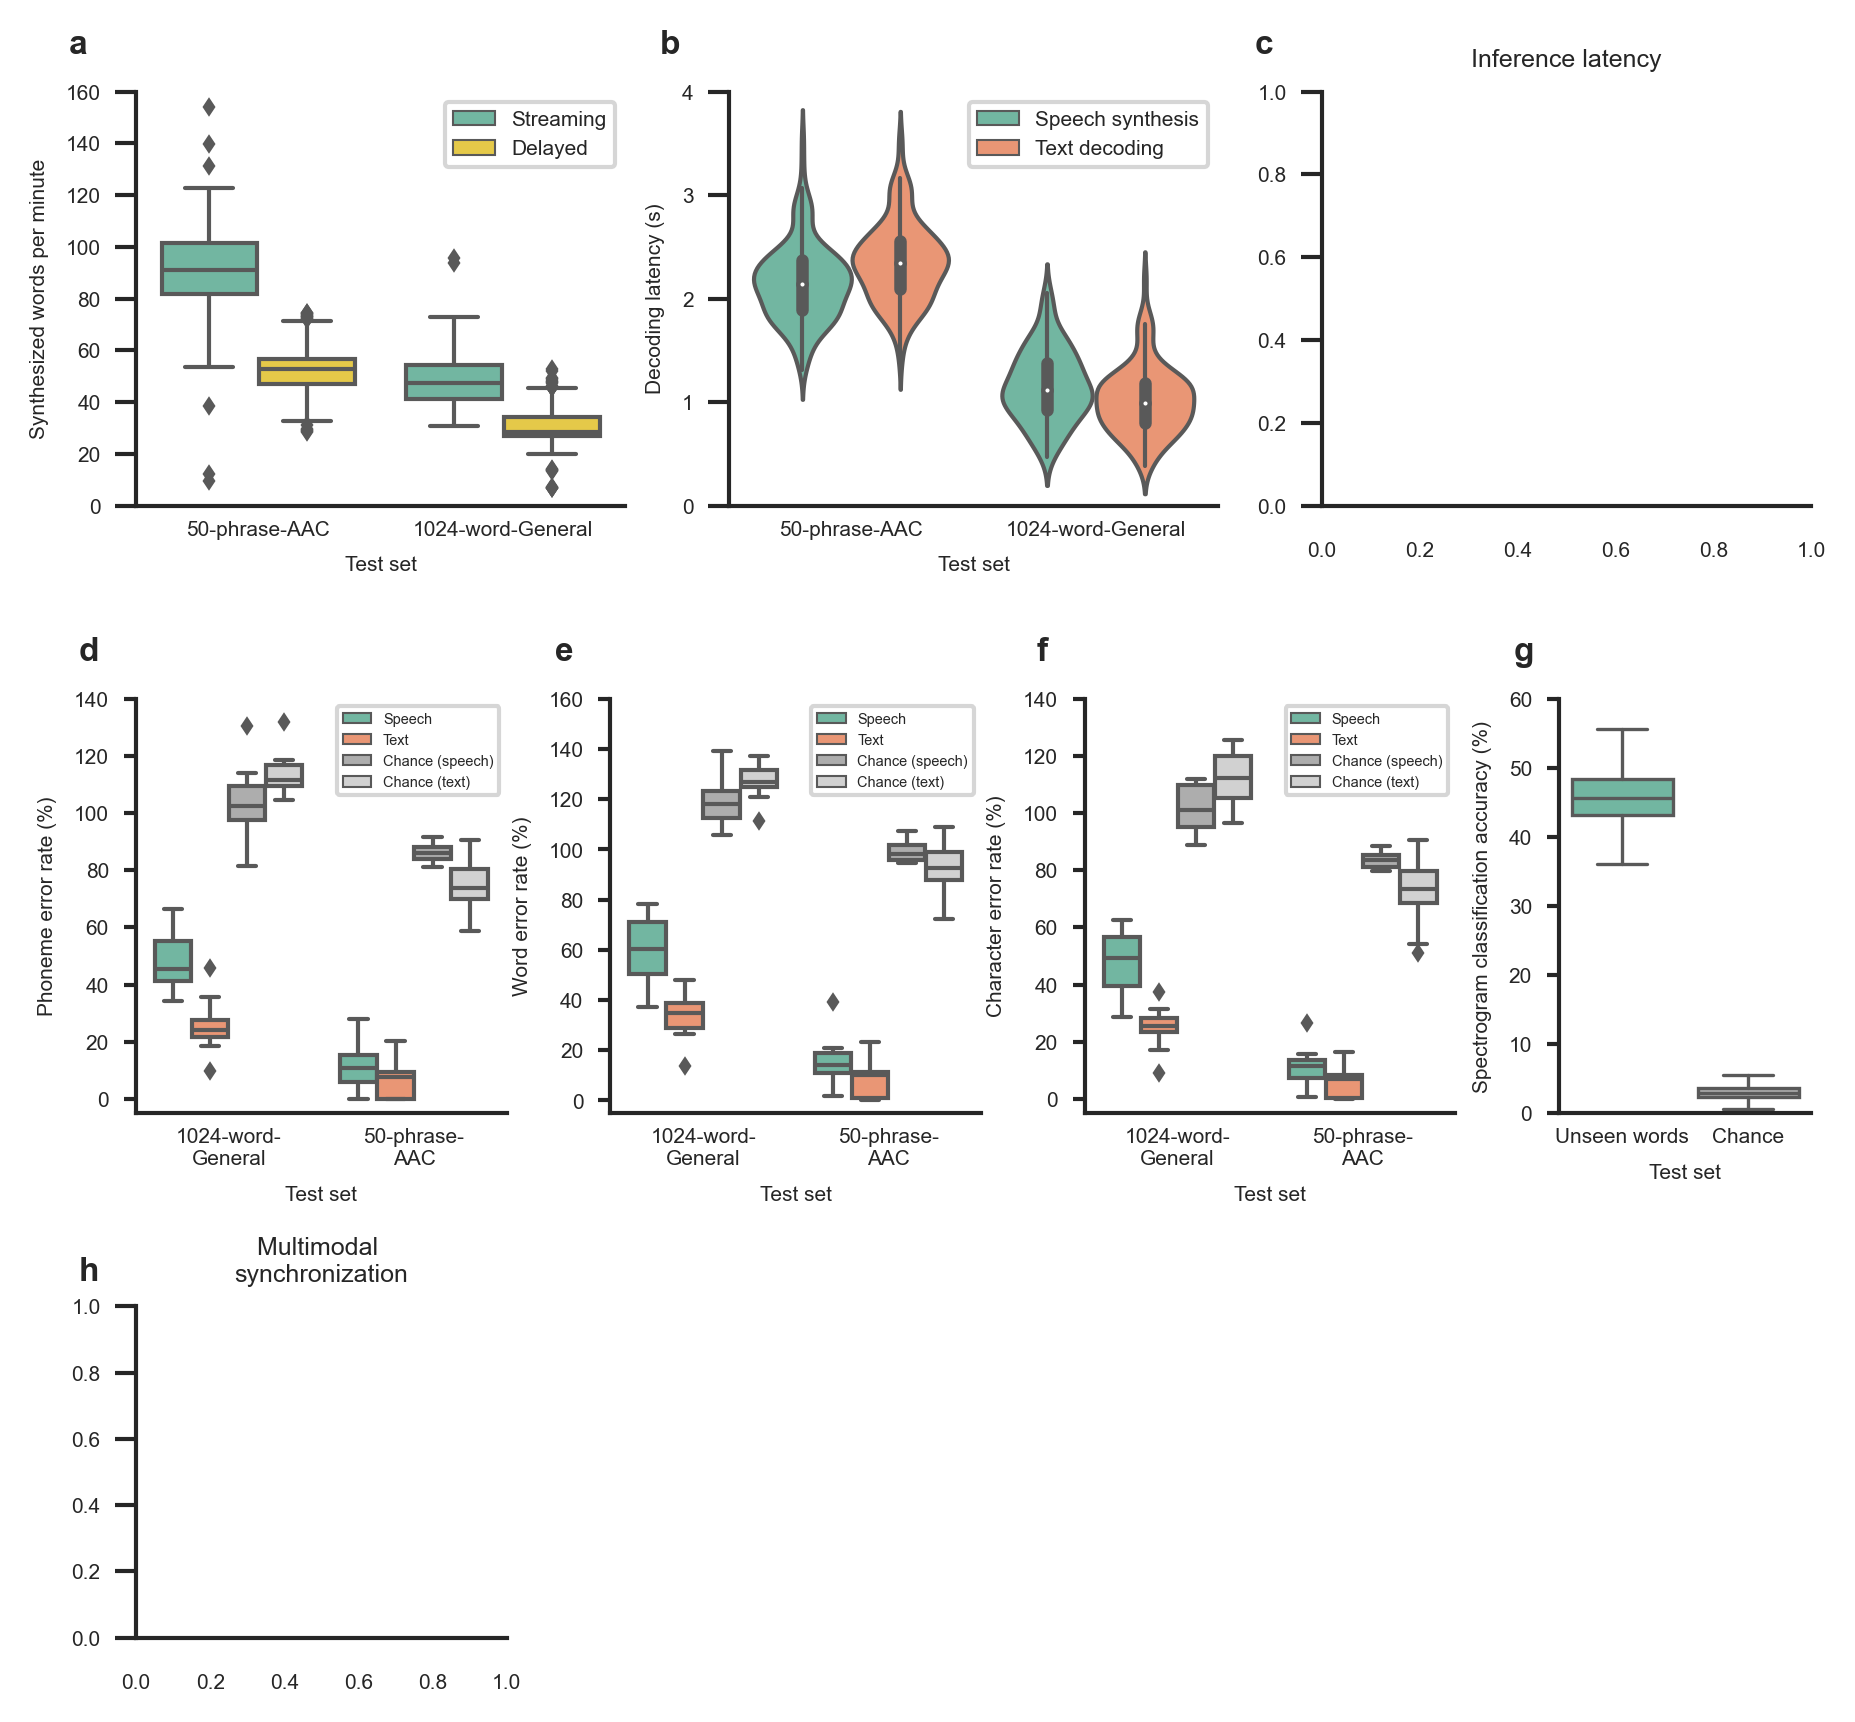

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compare text decoding and speech synthesis error rates
specified_comparisons = [
    "realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming",
    "metzger_metzger_b3_50phrases gt_audio_vs_pred_audio",
    "realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming",
    "metzger_metzger_b3_tm1k gt_audio_vs_pred_audio"
]
data = []
for comparison, metrics in latency_results_summary.items():
    if comparison in specified_comparisons:
        print(comparison)
        if "50phrases" in comparison:
            condition = '50-phrase-AAC'
        elif "tm1k" in comparison:
            condition = '1024-word-General'
        else:
            condition = 'Unknown'
        
        # Determine mode based on the comparison name
        mode = 'Streaming' if 'streaming' in comparison else 'Delayed'
        met = 'detection_wpm' if 'streaming' in comparison else 'wpms'
        bootstrapped_data = get_bootstrapped_accuracies(np.squeeze(metrics[met]), median=True, num_repeats=1000)
        confidence_interval = (np.percentile(bootstrapped_data,0.5).round(decimals=5), np.percentile(bootstrapped_data,99.5).round(decimals=5))
        print(np.median(metrics[met]).round(decimals=5), confidence_interval)
        if met == 'detection_wpm':
            try:
                metrics[met] = [m[0] for m in metrics[met]]
            except:
                pass
        for wpm in metrics.get(met, []):
            data.append({'Condition': condition, 'Mode': mode, 'Metric': 'WPM', 'Value': wpm})
            
df = pd.DataFrame(data)
ax = fig2_axes['a']
ax.cla()
ax.text(-0.1, 1.15, f"a", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
sns.set_style("white")
palette = [sns.color_palette("Set2")[0], sns.color_palette("Set2")[5]]
sns.boxplot(x='Condition', y='Value', hue='Mode', data=df, palette=palette,
               order=['50-phrase-AAC', '1024-word-General'], ax=ax, linewidth=1.0, flierprops=flierprops)
ax.set_ylim(0, 160)
ax.set_yticks(np.arange(0, 180, 20))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.axhline(y=14.2, color='grey', linestyle='--', linewidth=1, label="Current AAC device")
ax.set_ylabel('Synthesized words per minute')
ax.set_xlabel('Test set')
ax.legend()
ax.tick_params(axis='x', length=0)

display(fig2)

# Synchronization

Ignoring one sample from:  50-phrase-
AAC with diff:  2.788625
Ignoring one sample from:  50-phrase-
AAC with diff:  4.031375
realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming
185.0 (170.0, 210.0)
realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming
170.0 (130.0, 210.025)


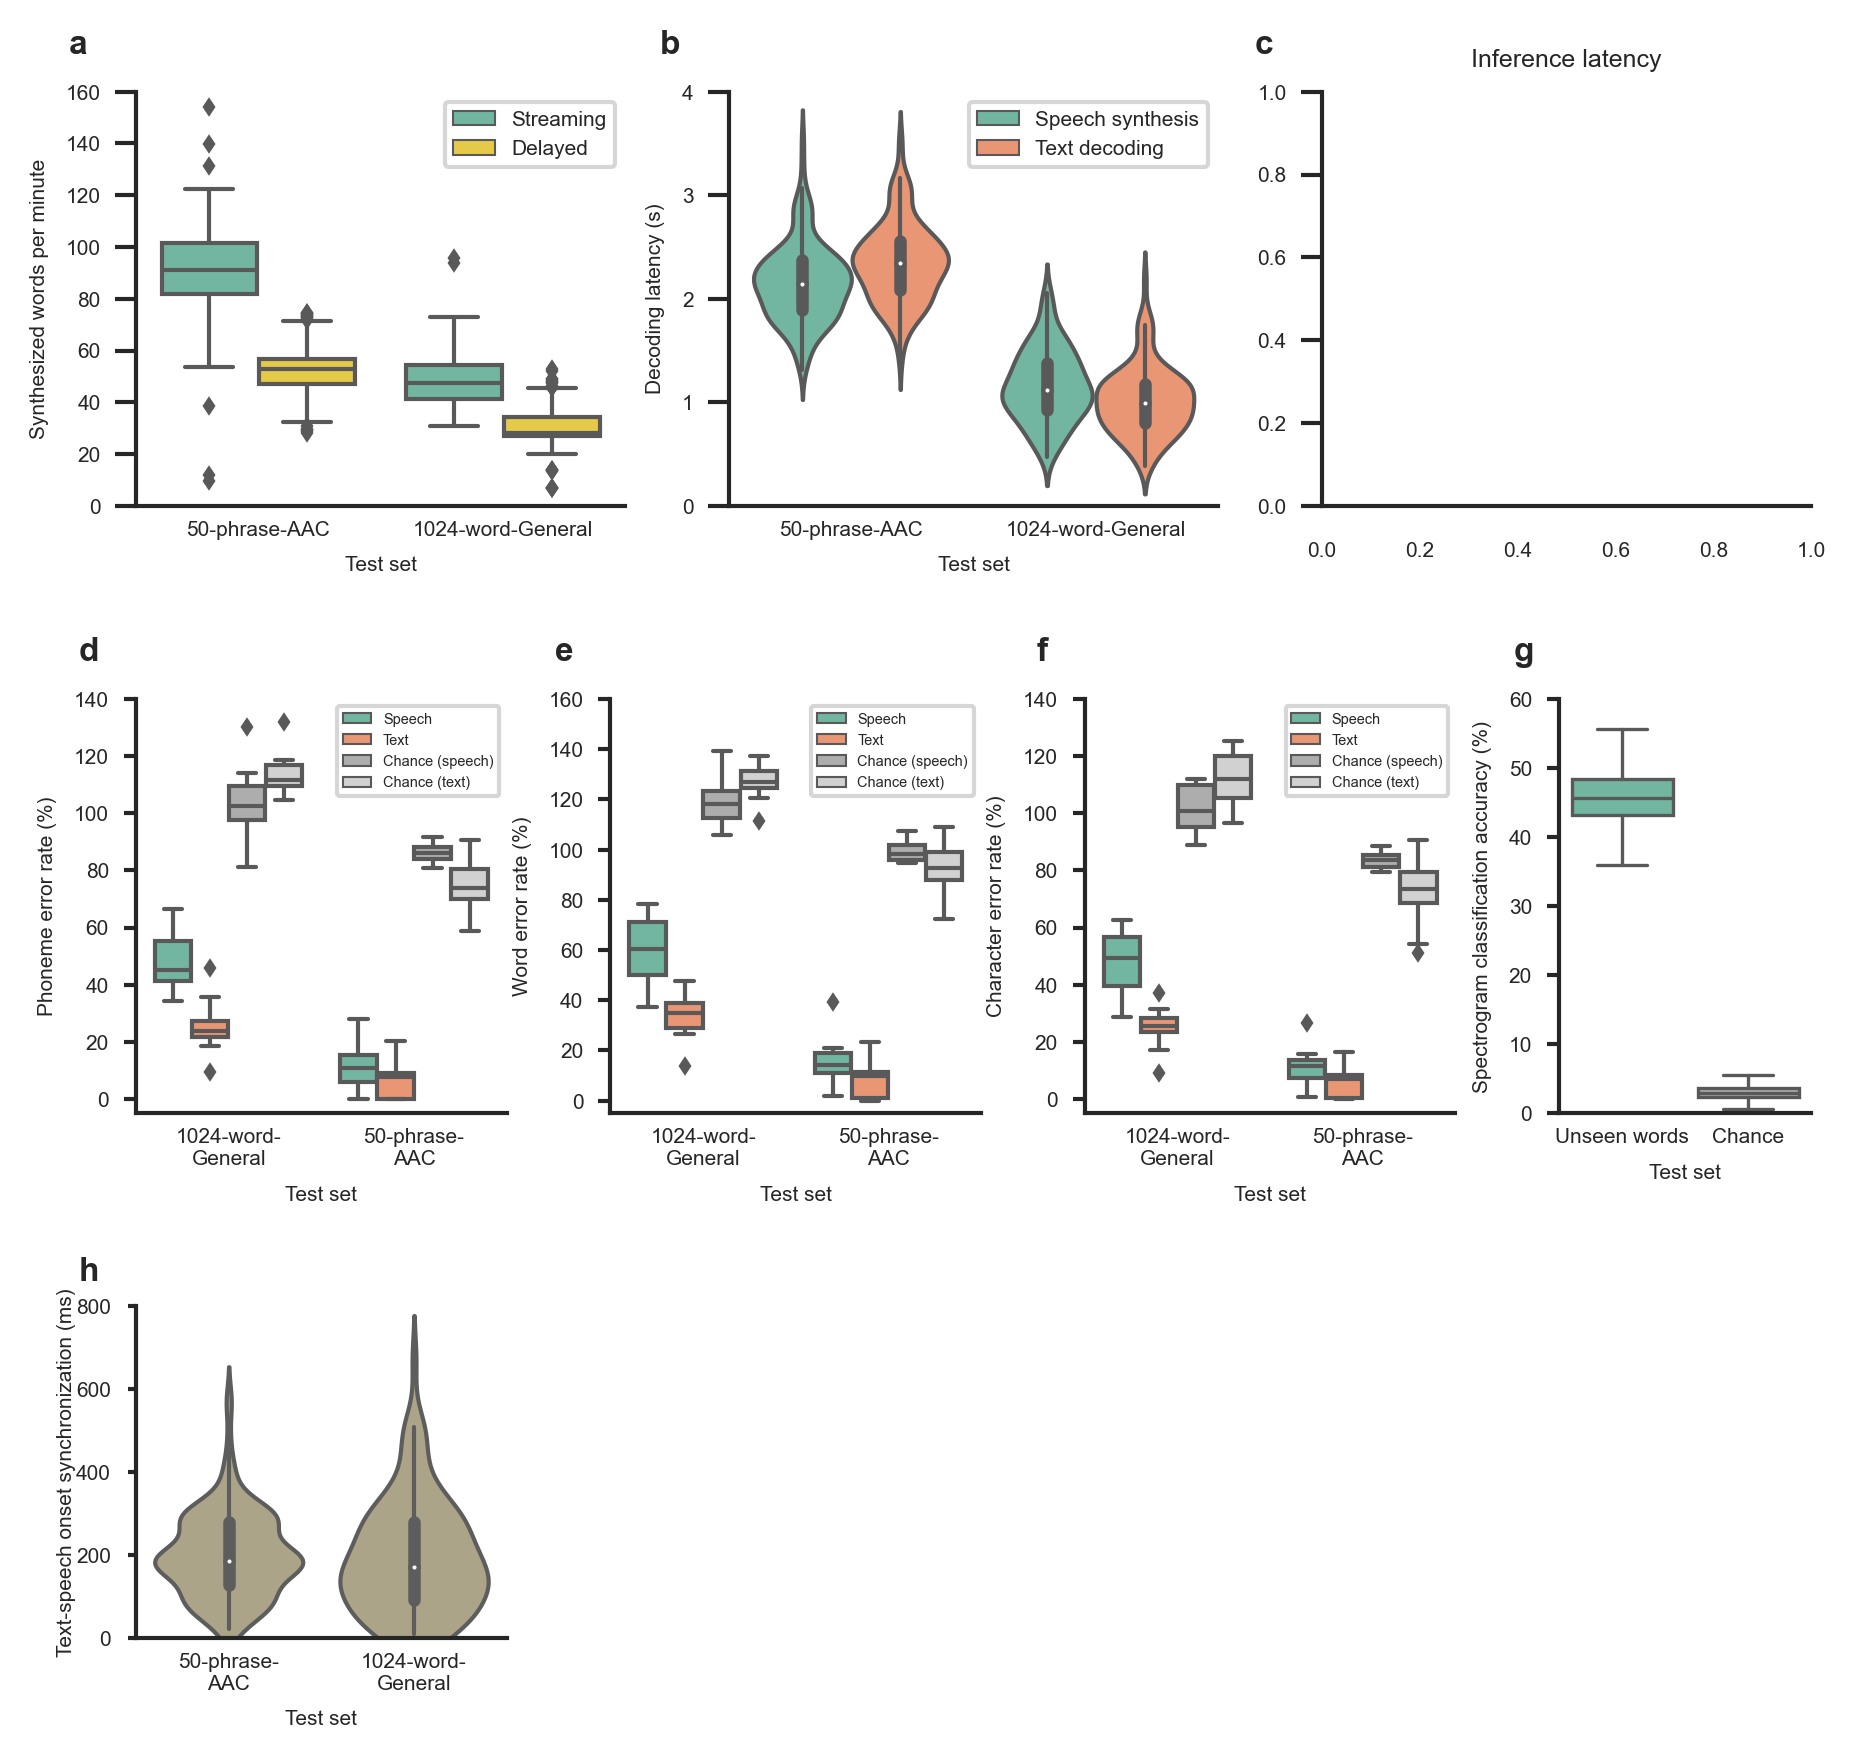

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compare text decoding and speech synthesis error rates
specified_comparisons = [
    "realtime_ecog_50phrases_synthesis gt_audio_vs_pred_audio_streaming",
    "realtime_ecog_tm1k_synthesis gt_audio_vs_pred_audio_streaming"
]
data = []
for comparison, metrics in latency_results_summary.items():
    if comparison in specified_comparisons:
        if "50phrases" in comparison:
            condition = '50-phrase-\nAAC'
        elif "500phrases" in comparison:
            condition = '500-phrase-AAC'
        elif "tm1k" in comparison:
            condition = '1024-word-\nGeneral'
        else:
            condition = 'Unknown'
        
        # Determine mode based on the comparison name
        mode = 'Streaming' if 'streaming' in comparison else 'Chance'
        diff_plots = []
        for onsets, text_onsets in zip(metrics.get('onsets', []), metrics.get('text_onsets', [])):
            diff = np.abs(onsets[0] - text_onsets)
            if diff > 1.0:
                print("Ignoring one sample from: ", condition, "with diff: ", diff)
                continue
            diff *= 1000
            data.append({'Condition': condition, 'Mode': mode, 'Metric': 'Onset', 'Value': diff})
            diff_plots.append(diff)
        print(comparison)
        bootstrapped_data = get_bootstrapped_accuracies(diff_plots, median=True, num_repeats=1000)
        confidence_interval = (np.percentile(bootstrapped_data,0.5).round(decimals=5), np.percentile(bootstrapped_data,99.5).round(decimals=5))
        print(np.median(diff_plots).round(decimals=5), confidence_interval)
        
df = pd.DataFrame(data)
ax = fig2_axes['h']
ax.cla()
ax.text(-0.1, 1.15, f"h", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})
sns.set_style("white")
palette = sns.color_palette("Set2", n_colors=8)
first_two_colors = palette[:2]
palette = [tuple(sum(col) / 2 for col in zip(*first_two_colors))]
filtered_df = df[df['Condition'] != '500-phrase-AAC']
sns.violinplot(x='Condition', y='Value', hue='Mode', data=filtered_df, palette=palette,
               order=['50-phrase-\nAAC', '1024-word-\nGeneral'], ax=ax, linewidth=1.0)
ax.set_ylim(0, 800)
ax.set_yticks(np.arange(0, 1000, 200))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.set_ylabel('Text-speech onset synchronization (ms)', labelpad=0)
ax.set_xlabel('Test set')
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=2, pad=4)

# Handle legend to ensure no repeating entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
ax.legend(handles=unique_handles, labels=unique_labels, loc='best')
ax.legend_ = None
display(fig2)

# Inference latency

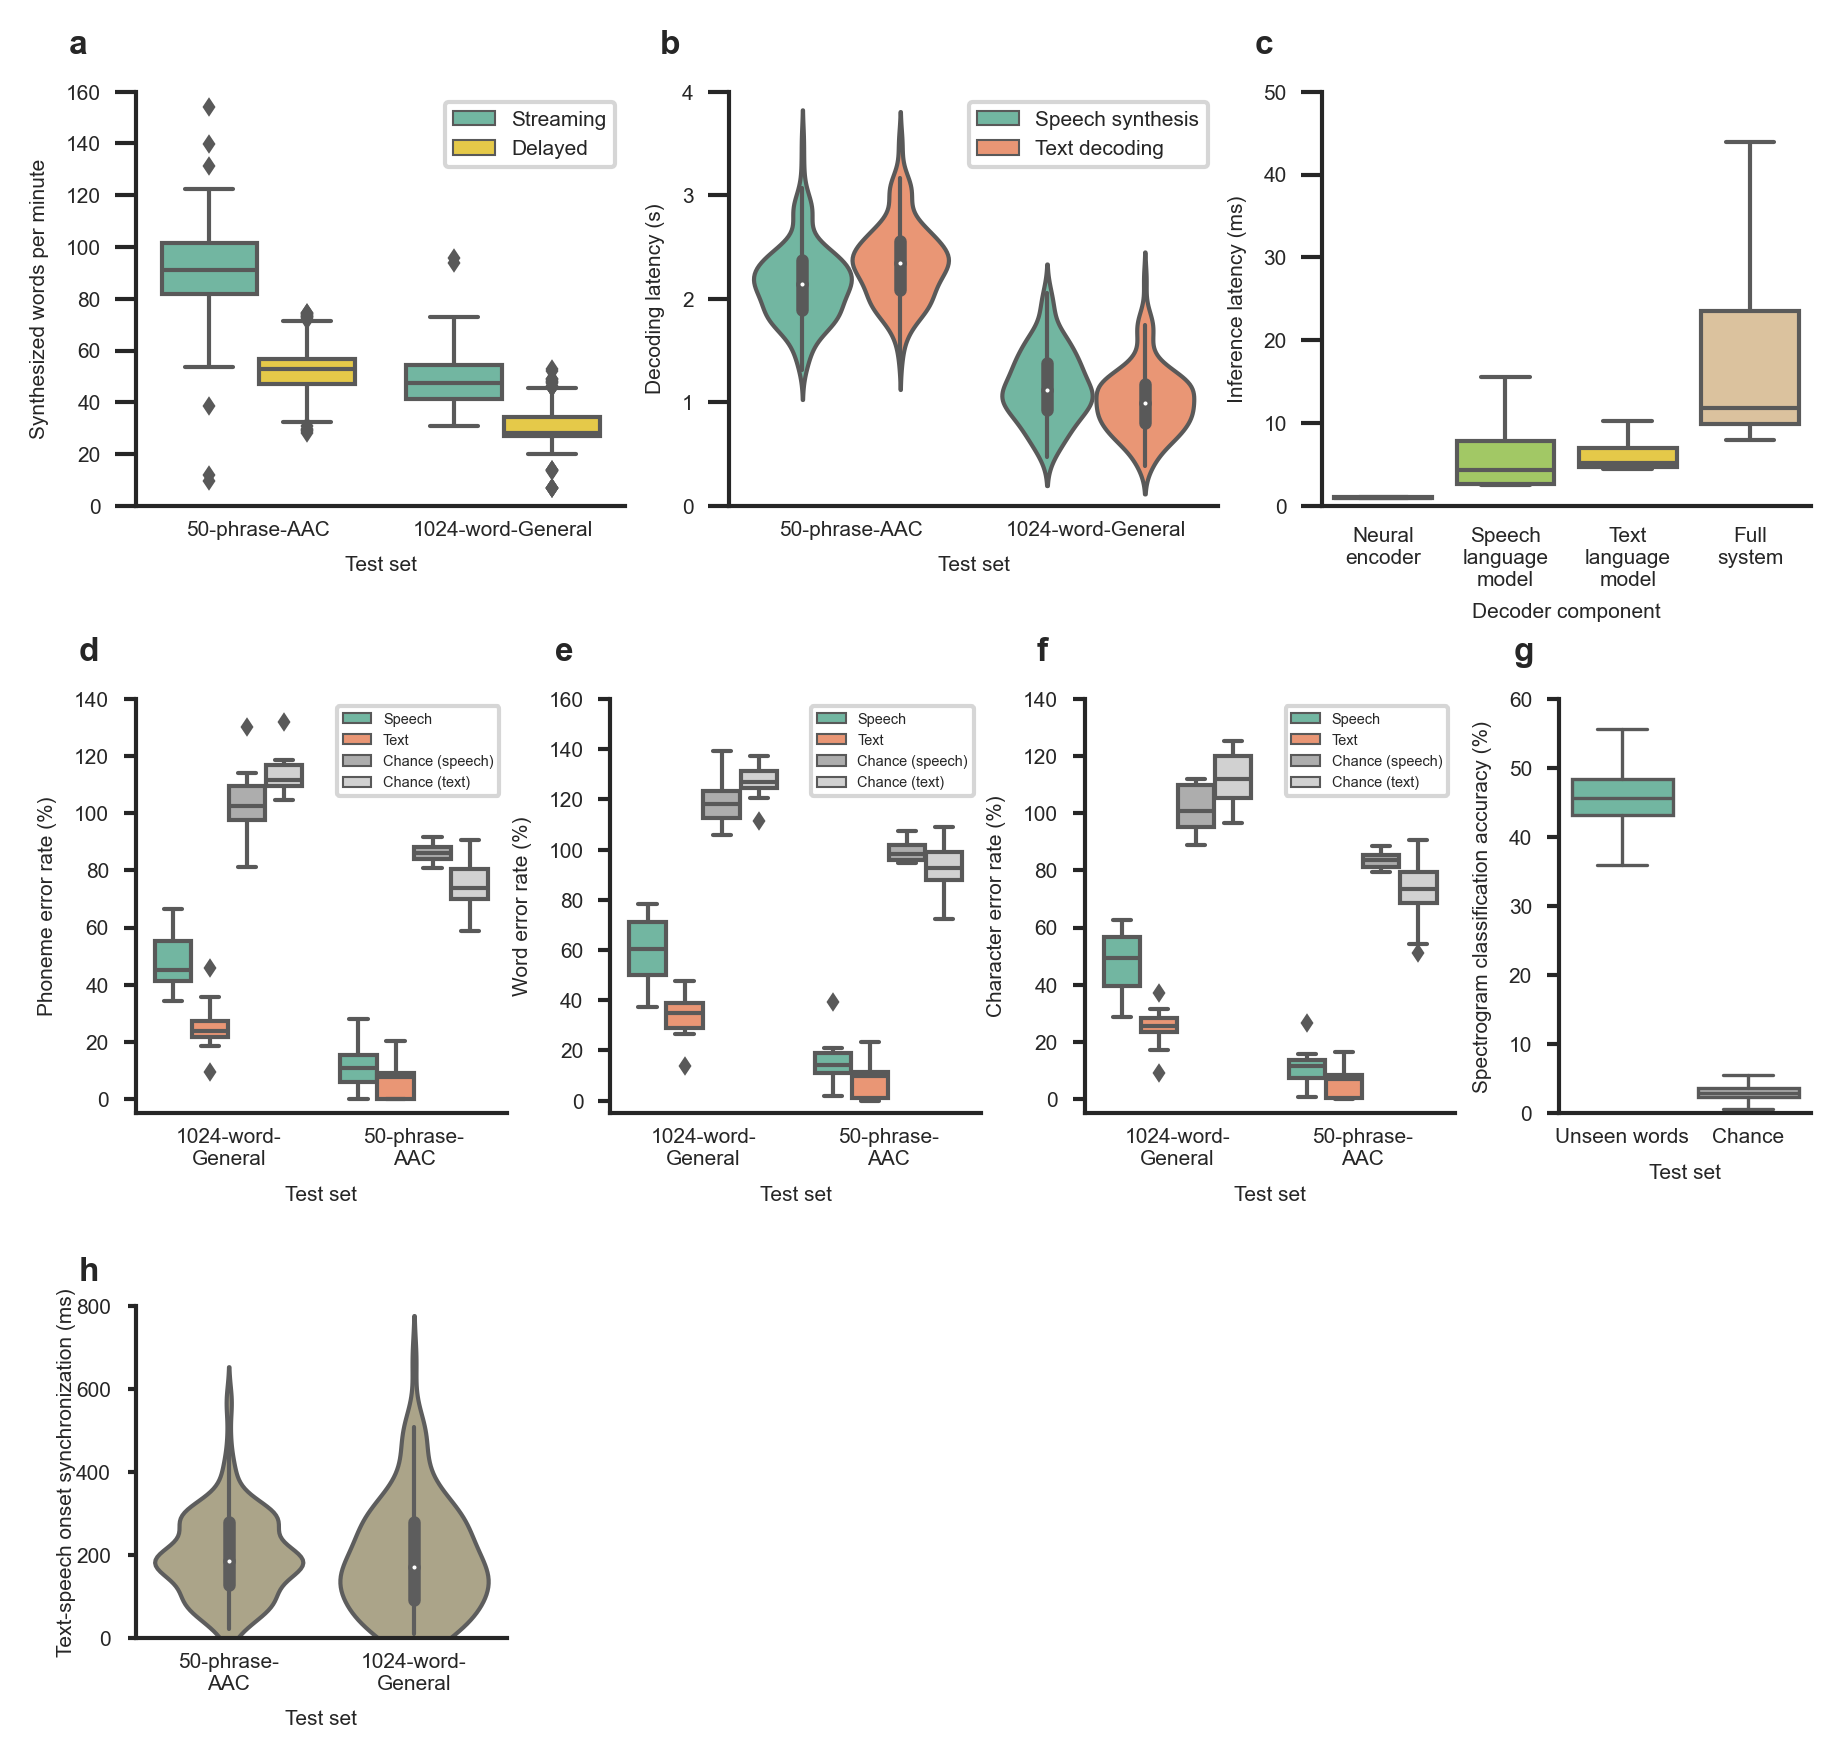

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Load inference latencies
latencies = np.load("iterated_total_latencies.npy")
latencies = latencies * 1000  # convert to ms
latencies = np.concatenate([latencies, latencies.sum(-1)[..., None]], -1)

# Updated names: Combine the two speech components
names = ['Neural\nencoder',
         'Speech\nlanguage\nmodel',
         'Text\nlanguage\nmodel',
         "Full\nsystem"]

# Prepare data for box plot
# Pairwise add "Speech hypothesis search" and "Speech synthesis" latencies
speech_decoder_data = latencies[..., 1] + latencies[..., 2]

# Create a list of all components' data
box_data = [latencies[..., 0].reshape(-1),  # Neural encoder
            speech_decoder_data.reshape(-1), # Speech decoder (pairwise added)
            latencies[..., 3].reshape(-1),  # Text hypothesis search
            latencies[..., 4].reshape(-1)]  # Complete decoder

# Concatenate the data and components for Seaborn
all_data = np.concatenate(box_data)
components = np.concatenate([[name] * len(data) for name, data in zip(names, box_data)])

# Create DataFrame for Seaborn plot
df = pd.DataFrame({
    'System component': components,
    'Inference latency (ms)': all_data
})

# Plot inference latencies using Seaborn box plot
ax = fig2_axes['c']
ax.cla()
ax.text(-0.1, 1.15, f"c", transform=ax.transAxes, fontsize=8, va='top', ha='right', fontdict={'weight': 'bold'})

palette = sns.color_palette('Set2')[3:]
sns.boxplot(ax=ax, x='System component', y='Inference latency (ms)', data=df, showfliers=False, palette=palette)

# Set axis labels and limits
ax.set_ylabel("Inference latency (ms)")
ax.set_xlabel("Decoder component", labelpad=3)
ax.set_ylim(0, 50)
ax.tick_params(axis='x', pad=0)

from numpy.random import default_rng

def bootstrap_ci_median(data, n_bootstraps=10000, ci_percentile=99, seed=42):
    rng = default_rng(seed)  # Set a fixed seed for reproducibility
    medians = []
    for _ in range(n_bootstraps):
        bootstrap_sample = rng.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    
    # Calculate the lower and upper bounds of the CI
    alpha = (100 - ci_percentile) / 2
    lower_bound = np.percentile(medians, alpha)
    upper_bound = np.percentile(medians, 100 - alpha)
    return lower_bound, upper_bound

# Show the plot
display(fig2)